# **ConcreteForce: Empowering Strength Prediction with Neural Networks**

## **Project Background**

Concrete is one of the most widely used construction materials due to its durability, versatility, and affordability. The compressive strength of concrete is a critical parameter that determines its ability to withstand loads and stresses in structural applications. Traditionally, the compressive strength of concrete is determined through time-consuming and costly experimental tests, which involve casting and curing concrete samples before subjecting them to destructive testing.

With the advancements in artificial intelligence and machine learning, there is an opportunity to develop predictive models that can accurately estimate the compressive strength of concrete using non-destructive methods. Deep neural networks (DNNs) have shown remarkable capabilities in learning complex patterns from data and making accurate predictions. By leveraging DNNs, we aim to create a predictive model that can estimate the compressive strength of concrete based on its composition and curing conditions.

## **Project Objectives**

The primary objective of this project is to develop a deep neural network model capable of accurately predicting the compressive strength of concrete. Specifically, the project aims to:

1. Data Collection: Gather a comprehensive dataset comprising various concrete mixtures along with their corresponding compressive strength values. The dataset will include information such as the type and proportions of cement, aggregates, water-cement ratio, curing duration, and other relevant factors.

2. Data Preprocessing: Clean and preprocess the collected data to remove outliers, handle missing values, and normalize the features. This step is crucial for ensuring the quality and reliability of the dataset for training the neural network model.

3. Model Development: Design and train a deep neural network architecture suitable for regression tasks. Experiment with different network architectures, activation functions, optimizers, and hyperparameters to find the configuration that yields the best performance in predicting concrete compressive strength.

4. Model Evaluation: Evaluate the performance of the trained neural network model using appropriate metrics such as mean absolute error, mean squared error, and coefficient of determination (R-squared). Conduct rigorous testing and validation to assess the model's accuracy, robustness, and generalization capabilities.

In [54]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from scipy.stats import kendalltau
from sklearn.ensemble import IsolationForest
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, Input, Flatten
from keras.optimizers.legacy import Adamax
from scikeras.wrappers import KerasRegressor
from keras.metrics import R2Score, MeanSquaredError
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow as tf

## **Data Loading**

Utilizing Kaggle (https://www.kaggle.com/datasets/hamzakhurshed/concrete-strength-dataset) for comprehensive concrete dataset for predictive modeling.

In [55]:
# load the dataset
concrete_df = pd.read_csv("train.csv").drop("Row ID", axis = 1)

# read the first five rows
concrete_df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,184.0,86.0,190.0,213.0,6.0,923.0,623.0,28,22.93
1,313.3,145.0,0.0,178.5,8.0,1001.9,688.7,28,41.05
2,387.0,20.0,94.0,157.0,13.9,938.0,845.0,7,45.90
3,162.0,214.0,164.0,202.0,10.0,820.0,680.0,28,30.65
4,252.3,0.0,98.8,146.3,14.2,987.8,889.0,14,42.29


In [56]:
# display the data information 
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            721 non-null    float64
 1   slag              721 non-null    float64
 2   flyash            721 non-null    float64
 3   water             721 non-null    float64
 4   superplasticizer  721 non-null    float64
 5   coarseaggregate   721 non-null    float64
 6   fineaggregate     721 non-null    float64
 7   age               721 non-null    int64  
 8   csMPa             721 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 50.8 KB


## **Data Visualization and Data Preprocessing**

### **(A) Check for Missing Values**

Checking missing values is to ensure data completeness and integrity, facilitating accurate analysis and decision-making processes.

In [57]:
# count the total number of missing values in all input features 
concrete_df.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

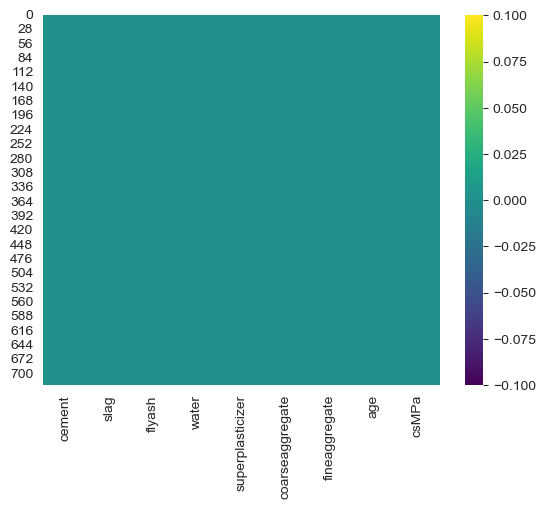

In [58]:
# visualize the presence of missing values in all input features 
sns.heatmap(concrete_df.isnull(), annot = False, cmap = 'viridis')
plt.show()

### **(B) Visualizing Relationship Between Ingredients and Concrete Strength**

Visualizing using scatterplots is to discern potential correlations or patterns between different input features and concrete compressive strength, aiding in understanding the relationship and identifying influential factors.

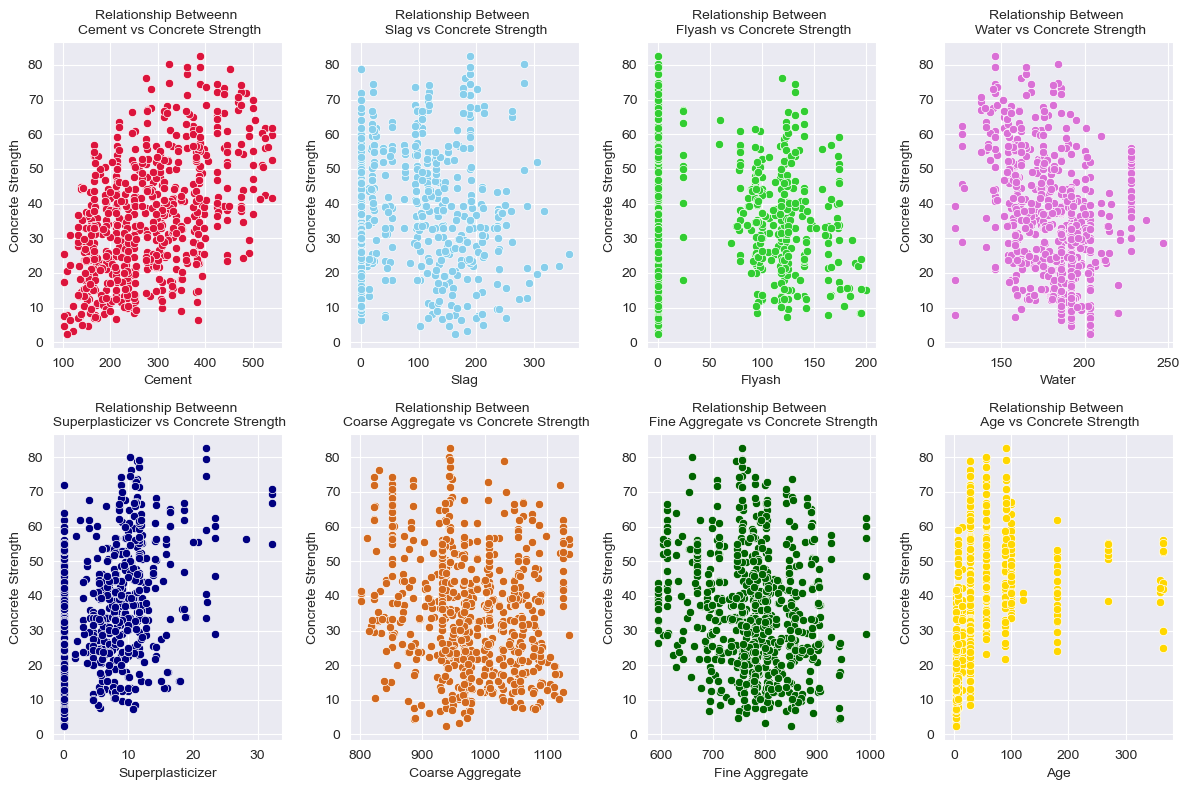

In [59]:
# use scatterplot to visualize the relationship between the input features and concrete strength 

plt.figure(figsize = (12, 8))
plt.subplot(2, 4, 1)
sns.scatterplot(x = "cement", y = "csMPa", data = concrete_df, color = "crimson")
plt.title("Relationship Betweenn \n Cement vs Concrete Strength", fontsize = 10)
plt.xlabel("Cement")
plt.ylabel("Concrete Strength")

plt.subplot(2, 4, 2)
sns.scatterplot(x = "slag", y = "csMPa", data = concrete_df, color = "skyblue")
plt.title("Relationship Between \n Slag vs Concrete Strength", fontsize = 10)
plt.xlabel("Slag")
plt.ylabel("Concrete Strength")

plt.subplot(2, 4, 3)
sns.scatterplot(x = "flyash", y = "csMPa", data = concrete_df, color = "limegreen")
plt.title("Relationship Between \n Flyash vs Concrete Strength", fontsize = 10)
plt.xlabel("Flyash")
plt.ylabel("Concrete Strength")

plt.subplot(2, 4, 4)
sns.scatterplot(x = "water", y = "csMPa", data = concrete_df, color = "orchid")
plt.title("Relationship Between \n Water vs Concrete Strength", fontsize = 10)
plt.xlabel("Water")
plt.ylabel("Concrete Strength")

plt.subplot(2, 4, 5)
sns.scatterplot(x = "superplasticizer", y = "csMPa", data = concrete_df, color = "navy")
plt.title("Relationship Betweenn \n Superplasticizer vs Concrete Strength", fontsize = 10)
plt.xlabel("Superplasticizer")
plt.ylabel("Concrete Strength")

plt.subplot(2, 4, 6)
sns.scatterplot(x = "coarseaggregate", y = "csMPa", data = concrete_df, color = "chocolate")
plt.title("Relationship Between \n Coarse Aggregate vs Concrete Strength", fontsize = 10)
plt.xlabel("Coarse Aggregate")
plt.ylabel("Concrete Strength")

plt.subplot(2, 4, 7)
sns.scatterplot(x = "fineaggregate", y = "csMPa", data = concrete_df, color = "darkgreen")
plt.title("Relationship Between \n Fine Aggregate vs Concrete Strength", fontsize = 10)
plt.xlabel("Fine Aggregate")
plt.ylabel("Concrete Strength")

plt.subplot(2, 4, 8)
sns.scatterplot(x = "age", y = "csMPa", data = concrete_df, color = "gold")
plt.title("Relationship Between \n Age vs Concrete Strength", fontsize = 10)
plt.xlabel("Age")
plt.ylabel("Concrete Strength")

plt.tight_layout()
plt.show()

### **(C) Visualizing the Kendall Correlation Between Numerical Variables**

Visualizing the Kendall correlation between numerical variables provides insight into the strength and direction of their ordinal relationships, aiding in understanding the degree of association while accounting for potential nonlinearities.

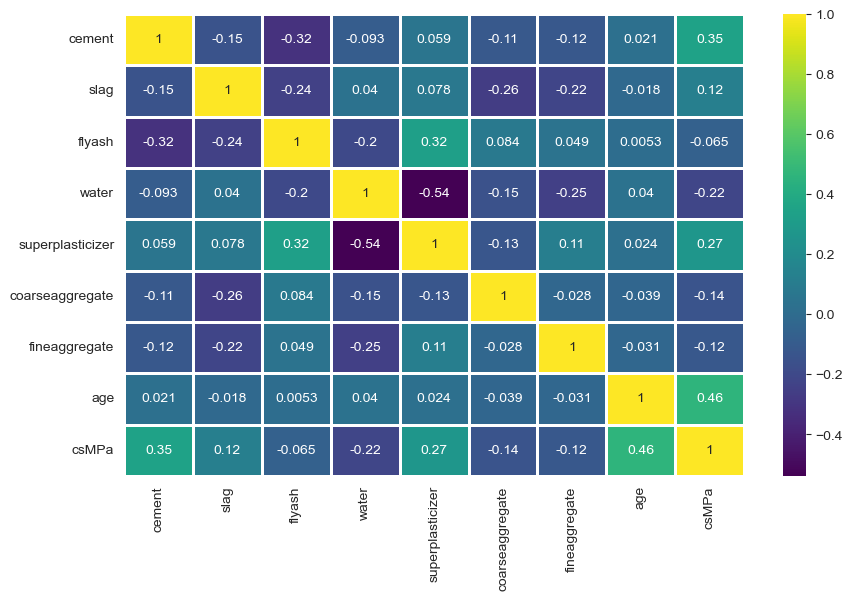

In [60]:
# use correlation plot to visualize the correlation between features 
plt.figure(figsize = (10, 6))
sns.heatmap(concrete_df.corr(method = "kendall"), annot = True, cmap = 'viridis', linewidths = 1)
plt.show()

### **(D) Feature Selection using Kendall Correlation Test**

Feature selection using the Kendall correlation test is to identify and retain the most relevant and least correlated features, thus improving model performance and interpretability while reducing redundancy in the dataset.

In [61]:
# perform correlation test using kendall tau

# extract the numerical features names 
num_feature_names = concrete_df.drop('csMPa', axis = 1).select_dtypes(include = ['float64', 'int64']).columns

# perform correlation test
for feature in num_feature_names:
    tau, pval = kendalltau(concrete_df[feature], concrete_df['csMPa'])

    print("Feature Name: " + feature)
    if pval < 0.05:
        print("p-value: {:.4f}".format(pval))
        print("p-value is less than 0.05 signficance level. There is an evidence to conclude that {} is statistically significant to csMPa".format(feature))
    else:
        print("p-value: {:.4f}".format(pval))
        print("p-value is less than 0.05 signficance level. There is an evidence to conclude that {} is statistically significant to csMPa".format(feature))
    print()

Feature Name: cement
p-value: 0.0000
p-value is less than 0.05 signficance level. There is an evidence to conclude that cement is statistically significant to csMPa

Feature Name: slag
p-value: 0.0000
p-value is less than 0.05 signficance level. There is an evidence to conclude that slag is statistically significant to csMPa

Feature Name: flyash
p-value: 0.0169
p-value is less than 0.05 signficance level. There is an evidence to conclude that flyash is statistically significant to csMPa

Feature Name: water
p-value: 0.0000
p-value is less than 0.05 signficance level. There is an evidence to conclude that water is statistically significant to csMPa

Feature Name: superplasticizer
p-value: 0.0000
p-value is less than 0.05 signficance level. There is an evidence to conclude that superplasticizer is statistically significant to csMPa

Feature Name: coarseaggregate
p-value: 0.0000
p-value is less than 0.05 signficance level. There is an evidence to conclude that coarseaggregate is statisti

### **(E) Anomaly Detection using Isolation Forest**

Performing anomaly detection using isolation forest is to identify and subsequently remove outliers or anomalous data points from the dataset, enhancing the quality and reliability of subsequent analysis or modeling tasks.

In [62]:
# anomalies detection using isolation forest

# initialize the isolation forest with specified parameters
iso = IsolationForest(random_state = 42)
# fit the isolation forest to the concrete data
iso.fit(concrete_df)
# predict the anomalies in the dataset using the trained isolation forest
prediction = iso.predict(concrete_df)
# filter the normal data points by selecting those with prediction label not equal to -1 
normal_data = concrete_df[prediction != -1]
# display the normal data
normal_data

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
1,313.3,145.0,0.0,178.5,8.0,1001.9,688.7,28,41.05
2,387.0,20.0,94.0,157.0,13.9,938.0,845.0,7,45.90
4,252.3,0.0,98.8,146.3,14.2,987.8,889.0,14,42.29
5,393.0,0.0,0.0,192.0,0.0,940.0,758.0,28,39.58
6,289.0,134.0,0.0,195.0,6.0,924.0,760.0,28,46.24
...,...,...,...,...,...,...,...,...,...
716,304.8,0.0,99.6,196.0,9.8,959.4,705.2,28,30.12
717,266.2,112.3,87.5,177.9,10.4,909.7,744.5,28,39.42
718,231.8,0.0,121.6,174.0,6.7,1056.4,778.5,3,15.44
719,183.9,122.6,0.0,203.5,0.0,959.2,800.0,90,32.53


In [63]:
# overwrite the normal data to the original concrete data 
concrete_df = normal_data

## **Data Splitting**

Splitting the data into 80% for training and 20% for testing is to effectively train a machine learning model on a larger portion of the dataset while reserving a separate portion to evaluate its performance and generalization ability.

In [64]:
# split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(concrete_df.drop('csMPa', axis = 1), 
                                                    concrete_df['csMPa'], 
                                                    shuffle = True, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(448, 8)
(112, 8)
(448,)
(112,)


## **Data Normalization**

Normalizing input features using the standard scaler is to scale and center the data, ensuring that each feature contributes equally to the model training process, thereby improving convergence and performance of machine learning algorithms.

In [65]:
# initialize the standard scaler
standard_scaling = StandardScaler()
# using the standard scaler to scale the training set 
X_train[num_feature_names] = standard_scaling.fit_transform(X_train[num_feature_names])
# using the standard scaler to scale the testing set
X_test[num_feature_names] = standard_scaling.transform(X_test[num_feature_names])
# display the first five rows
X_train.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
673,0.039025,-0.849223,1.054269,-1.168781,0.774387,1.112127,-0.131706,-0.889894
597,-1.516142,1.735770,-0.942810,0.901265,-0.608504,-0.423422,0.163391,-0.179855
1,0.457093,0.935653,-0.942810,-0.091223,0.393591,0.353160,-1.629115,-0.179855
15,1.679557,0.459276,-0.942810,-1.628161,2.518033,-0.614265,0.310097,-0.179855
353,0.457093,-0.849223,0.916085,-0.091223,0.393591,0.353160,-1.629115,-0.179855


## **Model Building - Neural Network**

### **(A) Deep Neural Network (DNN)**

The architecture of the deep neural network (DNN) defined by the provided code consists of two dense layers. The first dense layer has 128 neurons and uses the Gaussian Error Linear Unit (GELU) activation function, with L2 regularization applied to the kernel weights. This layer has an input dimension of 8, corresponding to the number of input features. A dropout layer with a dropout rate of 0.1 is inserted after the first dense layer to mitigate overfitting by randomly setting a fraction of input units to zero during training. The second dense layer consists of a single neuron with ReLU activation, which outputs the final prediction. Overall, this DNN architecture employs a feedforward structure with regularization and dropout mechanisms to facilitate learning and improve generalization performance.

In [66]:
def dnn():
    # initialize a sequential model
    dnn_model = Sequential()
    # add a fully connected dense layer 
    dnn_model.add(Dense(128, kernel_regularizer = 'l2', input_dim = 8, activation = "gelu"))
    # add a dropout layer
    dnn_model.add(Dropout(0.1))
    # add a fully connected dense layer for the output 
    dnn_model.add(Dense(1, activation = "relu"))
    return dnn_model

#### **Hold-Out Validation**

In [67]:
with tf.device("/CPU"):
    # create a kerasregressor instance using the defined DNN model, with specified parameters
    dnn_regressor = KerasRegressor(dnn, 
                                   loss = 'mean_squared_error',
                                   epochs = 30,
                                   batch_size = 32, 
                                   optimizer = Adamax(learning_rate = 0.1), 
                                   metrics = [R2Score, MeanSquaredError],
                                   random_state = 42)
    # fit the DNN regressor on the training data with a validation split of 0.2 
    dnn_regressor.fit(X_train, y_train, validation_split = 0.2)

Epoch 1/30
12/12 [==============================] - 0s 10ms/step - loss: 823.1204 - r2_score: -2.2351 - mean_squared_error: 822.3701 - val_loss: 326.8547 - val_r2_score: -0.4413 - val_mean_squared_error: 325.7145
Epoch 2/30
12/12 [==============================] - 0s 2ms/step - loss: 187.3672 - r2_score: 0.2678 - mean_squared_error: 186.1185 - val_loss: 110.7281 - val_r2_score: 0.5162 - val_mean_squared_error: 109.3342
Epoch 3/30
 1/12 [=>............................] - ETA: 0s - loss: 78.9100 - r2_score: 0.6700 - mean_squared_error: 77.5162

12/12 [==============================] - 0s 2ms/step - loss: 103.1986 - r2_score: 0.5997 - mean_squared_error: 101.7463 - val_loss: 86.0729 - val_r2_score: 0.6258 - val_mean_squared_error: 84.5673
Epoch 4/30
12/12 [==============================] - 0s 2ms/step - loss: 88.3699 - r2_score: 0.6584 - mean_squared_error: 86.8329 - val_loss: 73.0532 - val_r2_score: 0.6835 - val_mean_squared_error: 71.5133
Epoch 5/30
12/12 [==============================] - 0s 2ms/step - loss: 72.4668 - r2_score: 0.7211 - mean_squared_error: 70.9024 - val_loss: 55.1698 - val_r2_score: 0.7630 - val_mean_squared_error: 53.5531
Epoch 6/30
12/12 [==============================] - 0s 2ms/step - loss: 64.4988 - r2_score: 0.7528 - mean_squared_error: 62.8458 - val_loss: 49.1652 - val_r2_score: 0.7899 - val_mean_squared_error: 47.4784
Epoch 7/30
12/12 [==============================] - 0s 2ms/step - loss: 51.6119 - r2_score: 0.8037 - mean_squared_error: 49.8958 - val_loss: 45.9674 - val_r2_score: 0.8044 - val_mean_sq

In [68]:
# predict the target variable for the training and testing set usign the trained DNN
dnn_predict_train = dnn_regressor.predict(X_train)
dnn_predict_test = dnn_regressor.predict(X_test)

# create a DataFrame to store the evaluation metrics for the DNN model.
dnn_res = pd.DataFrame({'Train': [r2_score(y_train, dnn_predict_train), mean_squared_error(y_train, dnn_predict_train)], 
                        'Test': [r2_score(y_test, dnn_predict_test), mean_squared_error(y_test, dnn_predict_test)]}, 
                        index = ['R2-Score', 'MSE'])
# display the results
dnn_res

4/4 [==============================] - 0s 6ms/step


,Train,Test
R2-Score,0.917512,0.904730
MSE,20.507282,24.807976


#### **Learning Curves**

**Loss**

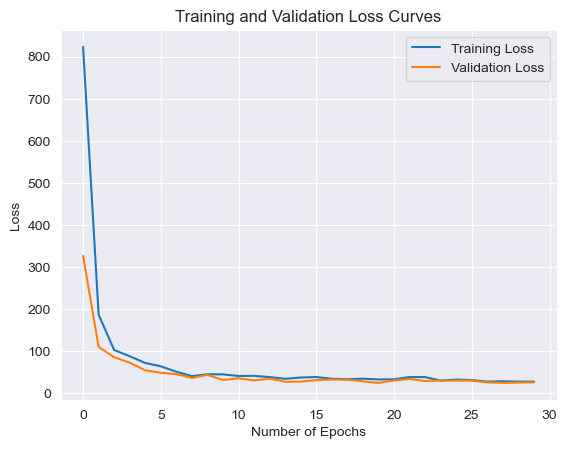

In [69]:
# plot the training and validation loss curves 
sns.set_style("darkgrid")
sns.lineplot(data = dnn_regressor.history_['loss'], label = "Training Loss")
sns.lineplot(data = dnn_regressor.history_['val_loss'], label = "Validation Loss")
plt.title("Training and Validation Loss Curves")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.show()

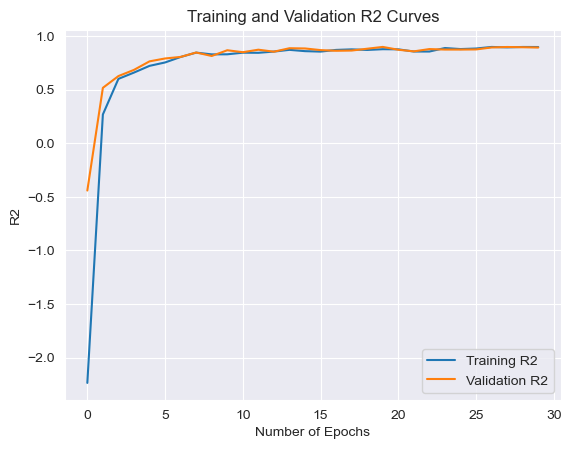

In [70]:
# plot the training and validation R2 curves
sns.set_style("darkgrid")
sns.lineplot(data = dnn_regressor.history_['r2_score'], label = "Training R2")
sns.lineplot(data = dnn_regressor.history_['val_r2_score'], label = "Validation R2")
plt.title("Training and Validation R2 Curves")
plt.xlabel("Number of Epochs")
plt.ylabel("R2")
plt.show()

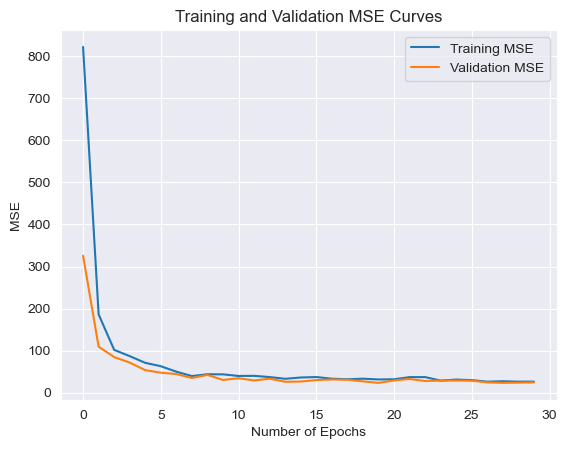

In [71]:
# plot the training and validation MSE curves
sns.set_style("darkgrid")
sns.lineplot(data = dnn_regressor.history_['mean_squared_error'], label = "Training MSE")
sns.lineplot(data = dnn_regressor.history_['val_mean_squared_error'], label = "Validation MSE")
plt.title("Training and Validation MSE Curves")
plt.xlabel("Number of Epochs")
plt.ylabel("MSE")
plt.show()

#### **Comparison Plot**

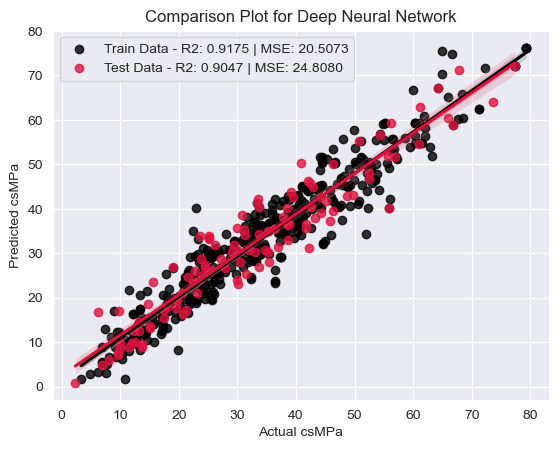

In [72]:
# create empty DataFrames
dnn_train_data = pd.DataFrame()
dnn_test_data = pd.DataFrame()

# populate the DataFrame with the actual and predicted values
dnn_train_data['Actual csMPa'] = y_train
dnn_train_data['Predicted csMPa'] = dnn_predict_train
dnn_test_data['Actual csMPa'] = y_test
dnn_test_data['Predicted csMPa'] = dnn_predict_test

# plot regression plots for both training and testing data 
sns.regplot(x = "Actual csMPa", y = "Predicted csMPa", data = dnn_train_data, color = "black", label = "Train Data - R2: {:.4f} | MSE: {:.4f}".format(r2_score(dnn_train_data['Actual csMPa'], dnn_train_data['Predicted csMPa']), mean_squared_error(dnn_train_data['Actual csMPa'], dnn_train_data['Predicted csMPa'])))
sns.regplot(x = "Actual csMPa", y = "Predicted csMPa", data = dnn_test_data, color = "crimson", label = "Test Data - R2: {:.4f} | MSE: {:.4f}".format(r2_score(dnn_test_data['Actual csMPa'], dnn_test_data['Predicted csMPa']), mean_squared_error(dnn_test_data['Actual csMPa'], dnn_test_data['Predicted csMPa'])))
plt.title("Comparison Plot for Deep Neural Network")
plt.xlabel("Actual csMPa")
plt.ylabel("Predicted csMPa")
plt.legend()
plt.show()

Most of the training and testing data align along the diagonal line, it suggests that the 1D-CNN predictions closely match the actual values. This alignment signifies that the model is effectively capturing the underlying patterns and trends in the data, leading to accurate predictions. The diagonal line represents perfect prediction, where the predicted values are equal to the actual values. Therefore, the proximity of the data points to this line indicates the model's ability to generalize well and make reliable predictions across the dataset, implying a strong performance of the 1D-CNN regressor in capturing the relationships within the input data.

#### **K-Fold Cross-Validation**

In [73]:
# initialize lists to store evaluation metrics for each fold
dnn_r2_score_train_list = list()
dnn_r2_score_val_list = list()
dnn_mse_train_list = list()
dnn_mse_val_list = list()

with tf.device("/CPU"):
    # define cross-validation value
    cv = KFold(n_splits = 10, shuffle = True, random_state = 42)

    # iterate over each fold
    for train_idx, val_idx in cv.split(X_train):
        # split the data into training and validation sets
        X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # create a DNN regressor for each fold
        dnn_regressor_cv = KerasRegressor(dnn, 
                                        loss = 'mean_squared_error',
                                        epochs = 30,
                                        batch_size = 32, 
                                        optimizer = Adamax(learning_rate = 0.1), 
                                        metrics = [R2Score, MeanSquaredError],
                                        random_state = 42)
        # fit the DNN regressor on the training data and validation split of 0.2
        dnn_regressor_cv.fit(X_train_cv, y_train_cv, validation_split = 0.2)

        # predict the target variable for the training and validation data
        dnn_predict_train_cv = dnn_regressor_cv.predict(X_train_cv)
        dnn_predict_val_cv = dnn_regressor_cv.predict(X_val_cv)

        # compute R2 score and MSE for the training and validation data
        dnn_r2_score_train = r2_score(y_train_cv, dnn_predict_train_cv)
        dnn_r2_score_val = r2_score(y_val_cv, dnn_predict_val_cv)
        dnn_mse_train = mean_squared_error(y_train_cv, dnn_predict_train_cv)
        dnn_mse_val = mean_squared_error(y_val_cv, dnn_predict_val_cv)

        # append the evaluation metrics to the respective data
        dnn_r2_score_train_list.append(dnn_r2_score_train)
        dnn_r2_score_val_list.append(dnn_r2_score_val)
        dnn_mse_train_list.append(dnn_mse_train)
        dnn_mse_val_list.append(dnn_mse_val)


Epoch 1/30
11/11 [==============================] - 0s 10ms/step - loss: 707.9224 - r2_score: -1.9622 - mean_squared_error: 707.2126 - val_loss: 241.7401 - val_r2_score: -0.0795 - val_mean_squared_error: 240.5453
Epoch 2/30
11/11 [==============================] - 0s 2ms/step - loss: 169.5133 - r2_score: 0.2954 - mean_squared_error: 168.2080 - val_loss: 105.9782 - val_r2_score: 0.5303 - val_mean_squared_error: 104.6770
Epoch 3/30
11/11 [==============================] - 0s 2ms/step - loss: 117.5855 - r2_score: 0.5130 - mean_squared_error: 116.2780 - val_loss: 97.6788 - val_r2_score: 0.5677 - val_mean_squared_error: 96.3372
Epoch 4/30
11/11 [==============================] - 0s 2ms/step - loss: 89.4343 - r2_score: 0.6311 - mean_squared_error: 88.0697 - val_loss: 94.9077 - val_r2_score: 0.5804 - val_mean_squared_error: 93.5073
Epoch 5/30
11/11 [==============================] - 0s 2ms/step - loss: 83.3839 - r2_score: 0.6567 - mean_squared_error: 81.9653 - val_loss: 71.3442 - val_r2_score

In [74]:
# create a dataframe to store the CV evaluation metrics 
dnn_res_cv = pd.DataFrame({'Train': [np.mean(dnn_r2_score_train_list), np.mean(dnn_mse_train_list)], 
                        'Test': [np.mean(dnn_r2_score_val_list), np.mean(dnn_mse_val_list)]}, 
                        index = ['R2-Score', 'MSE'])
# display the results 
dnn_res_cv

,Train,Test
R2-Score,0.907086,0.865536
MSE,23.080122,31.740225


The results from hold-out validation, with a train R2-Score of 0.917512 and test R2-Score of 0.904730, demonstrate strong performance in predicting the target variable, albeit slightly lower on the test set, along with relatively low mean squared error (MSE) values of 20.507282 and 24.807976 for train and test sets respectively. In contrast, K-Fold cross-validation yielded slightly lower R2-Scores for both train (0.907086) and test (0.865536) sets, indicating a slight decrease in model generalization compared to hold-out validation. Additionally, the MSE values for K-Fold cross-validation were higher than those from hold-out validation, with train and test MSE of 23.080122 and 31.740225 respectively, suggesting a slightly poorer fit to the data when using this cross-validation technique.

### **(B) 1-Dimensional Convolutional Neural Network (1D-CNN)**

The architecture of the deep neural network defined by the provided code involves a one-dimensional convolutional neural network (CNN) followed by dense layers. The input data is reshaped into a three-dimensional format to fit the convolutional layer's input requirements. The CNN consists of a convolutional layer with 16 filters, each with a kernel size of 5 and GELU activation, with padding applied to maintain the input size. Subsequently, the output is flattened to be compatible with the following dense layers. The dense layers consist of 128 neurons with GELU activation and L2 regularization, followed by a dropout layer to prevent overfitting. Finally, a single neuron with ReLU activation serves as the output layer for prediction. This architecture leverages convolutional operations for feature extraction and subsequent dense layers for further processing and prediction.

In [75]:
# reshape the training and testing data into 3D 
X_train_reshape = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshape = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)
# print the shape of the reshaped training and testing data
print(X_train_reshape.shape)
print(X_test_reshape.shape)

(448, 8, 1)
(112, 8, 1)


In [76]:
def conv1D():
    # initialize a sequential model
    conv1D_model = Sequential()
    # add an input layer with the shape matching the reshaped training data 
    conv1D_model.add(Input(shape = (X_train_reshape.shape[1], X_train_reshape.shape[2])))
    # add 1D convolutional layer
    conv1D_model.add(Conv1D(16, kernel_size = 5, padding = "same", activation = "gelu"))
    # flatten the output layer of the convolutional layer to feed it into dense layers
    conv1D_model.add(Flatten())
    # add a fully connected dense layer
    conv1D_model.add(Dense(128, kernel_regularizer = 'l2', input_dim = 8, activation = "gelu"))
    # add a dropout layer 
    conv1D_model.add(Dropout(0.1))
    # add a fully connected dense layer for the output 
    conv1D_model.add(Dense(1, activation = "relu"))
    return conv1D_model

#### **Hold-Out Validation**

In [77]:
with tf.device("/CPU"):
    # create a KerasRegressor instance using the defined 1D CNN model with specified parameters 
    conv1D_regressor = KerasRegressor(conv1D, 
                                    loss = 'mean_squared_error',
                                    epochs = 30,
                                    batch_size = 32, 
                                    optimizer = Adamax(learning_rate = 0.1), 
                                    metrics = [R2Score, MeanSquaredError],
                                    random_state = 42)
    # fit the 1D-CNN regressor on the reshaped training data with a validation split of 0.2 
    conv1D_regressor.fit(X_train_reshape, y_train, validation_split = 0.2)

Epoch 1/30


12/12 [==============================] - 0s 10ms/step - loss: 502.9643 - r2_score: -0.9559 - mean_squared_error: 497.2057 - val_loss: 122.9542 - val_r2_score: 0.4915 - val_mean_squared_error: 114.9214
Epoch 2/30
12/12 [==============================] - 0s 2ms/step - loss: 107.8378 - r2_score: 0.6096 - mean_squared_error: 99.2495 - val_loss: 76.7469 - val_r2_score: 0.7007 - val_mean_squared_error: 67.6414
Epoch 3/30
12/12 [==============================] - 0s 2ms/step - loss: 73.7645 - r2_score: 0.7463 - mean_squared_error: 64.4833 - val_loss: 51.8590 - val_r2_score: 0.8124 - val_mean_squared_error: 42.3896
Epoch 4/30
12/12 [==============================] - 0s 2ms/step - loss: 57.3932 - r2_score: 0.8118 - mean_squared_error: 47.8435 - val_loss: 47.8695 - val_r2_score: 0.8299 - val_mean_squared_error: 38.4329
Epoch 5/30
12/12 [==============================] - 0s 2ms/step - loss: 53.2607 - r2_score: 0.8273 - mean_squared_error: 43.9027 - val_loss: 42.4164 - val_r2_score: 0.8532 - val_me

In [78]:
# predict the target variable for the training and testing sets using the trained 1D-CNN regressor
conv1D_predict_train = conv1D_regressor.predict(X_train_reshape)
conv1D_predict_test = conv1D_regressor.predict(X_test_reshape)

# create a DataFrame to store the evaluation metrics for the 1D-CNN model
conv1D_res = pd.DataFrame({'Train': [r2_score(y_train, conv1D_predict_train), mean_squared_error(y_train, conv1D_predict_train)], 
                        'Test': [r2_score(y_test, conv1D_predict_test), mean_squared_error(y_test, conv1D_predict_test)]}, 
                        index = ['R2-Score', 'MSE'])
# display the results
conv1D_res

4/4 [==============================] - 0s 11ms/step


,Train,Test
R2-Score,0.925348,0.909768
MSE,18.559225,23.496241


#### **Learning Curves**

**Loss**

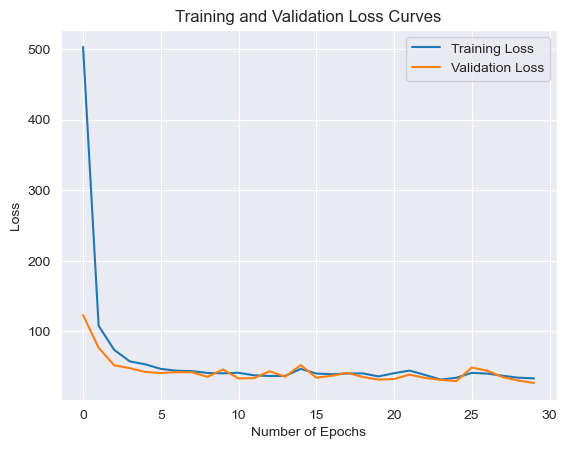

In [79]:
# plot the training and validation loss curves
sns.set_style("darkgrid")
sns.lineplot(data = conv1D_regressor.history_['loss'], label = "Training Loss")
sns.lineplot(data = conv1D_regressor.history_['val_loss'], label = "Validation Loss")
plt.title("Training and Validation Loss Curves")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.show()

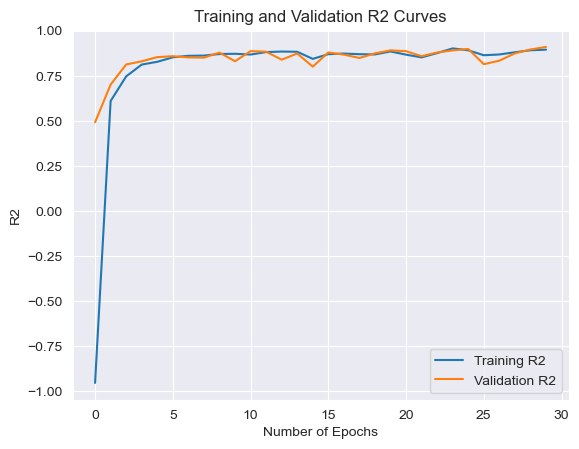

In [80]:
# plot the training and validation R2 curves
sns.set_style("darkgrid")
sns.lineplot(data = conv1D_regressor.history_['r2_score'], label = "Training R2")
sns.lineplot(data = conv1D_regressor.history_['val_r2_score'], label = "Validation R2")
plt.title("Training and Validation R2 Curves")
plt.xlabel("Number of Epochs")
plt.ylabel("R2")
plt.show()

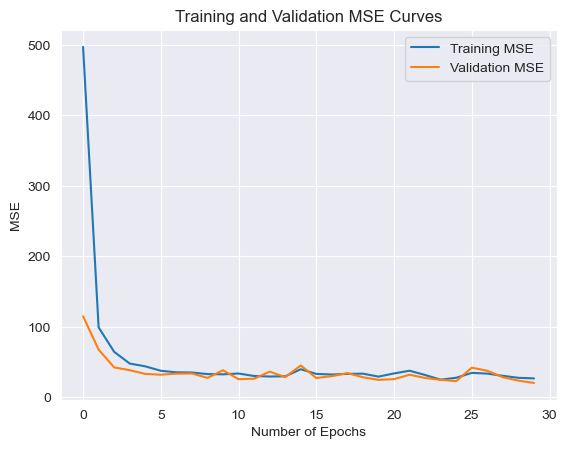

In [81]:
# plot the training and validation MSE curves
sns.set_style("darkgrid")
sns.lineplot(data = conv1D_regressor.history_['mean_squared_error'], label = "Training MSE")
sns.lineplot(data = conv1D_regressor.history_['val_mean_squared_error'], label = "Validation MSE")
plt.title("Training and Validation MSE Curves")
plt.xlabel("Number of Epochs")
plt.ylabel("MSE")
plt.show()

#### **Comparison Plot**

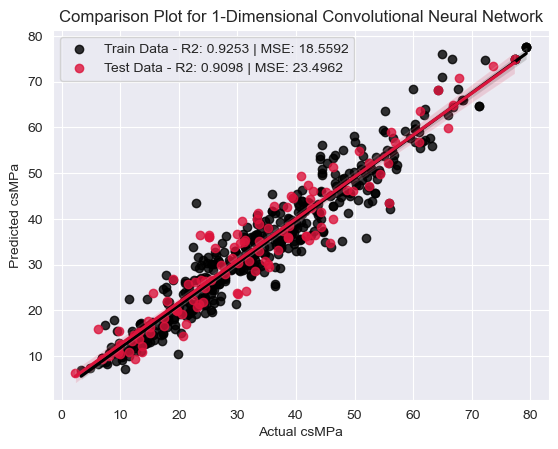

In [82]:
# create an empty DataFrame
conv1D_train_data = pd.DataFrame()
conv1D_test_data = pd.DataFrame()

# populate the DataFrame with the actual and predicted values
conv1D_train_data['Actual csMPa'] = y_train
conv1D_train_data['Predicted csMPa'] = conv1D_predict_train
conv1D_test_data['Actual csMPa'] = y_test
conv1D_test_data['Predicted csMPa'] = conv1D_predict_test

# plot regression plots for both training and testing data 
sns.regplot(x = "Actual csMPa", y = "Predicted csMPa", data = conv1D_train_data, color = "black", label = "Train Data - R2: {:.4f} | MSE: {:.4f}".format(r2_score(conv1D_train_data['Actual csMPa'], conv1D_train_data['Predicted csMPa']), mean_squared_error(conv1D_train_data['Actual csMPa'], conv1D_train_data['Predicted csMPa'])))
sns.regplot(x = "Actual csMPa", y = "Predicted csMPa", data = conv1D_test_data, color = "crimson", label = "Test Data - R2: {:.4f} | MSE: {:.4f}".format(r2_score(conv1D_test_data['Actual csMPa'], conv1D_test_data['Predicted csMPa']), mean_squared_error(conv1D_test_data['Actual csMPa'], conv1D_test_data['Predicted csMPa'])))
plt.title("Comparison Plot for 1-Dimensional Convolutional Neural Network")
plt.xlabel("Actual csMPa")
plt.ylabel("Predicted csMPa")
plt.legend()
plt.show()

Most of the training and testing data align along the diagonal line, it suggests that the 1D-CNN predictions closely match the actual values. This alignment signifies that the model is effectively capturing the underlying patterns and trends in the data, leading to accurate predictions. The diagonal line represents perfect prediction, where the predicted values are equal to the actual values. Therefore, the proximity of the data points to this line indicates the model's ability to generalize well and make reliable predictions across the dataset, implying a strong performance of the 1D-CNN regressor in capturing the relationships within the input data.

#### **K-Fold Cross-Validation**

In [83]:
# initialize lists to store evaluation metrics for each fold
conv1D_r2_score_train_list = list()
conv1D_r2_score_val_list = list()
conv1D_mse_train_list = list()
conv1D_mse_val_list = list()

with tf.device("/CPU"):
    # define cross-validation value
    cv = KFold(n_splits = 10, shuffle = True, random_state = 42)

    # iterate over each fold
    for train_idx, val_idx in cv.split(X_train_reshape):
         # split the data into training and validation sets
        X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # create a 1D-CNN regressor for each fold
        conv1D_regressor_cv = KerasRegressor(conv1D, 
                                            loss = 'mean_squared_error',
                                            epochs = 30,
                                            batch_size = 32, 
                                            optimizer = Adamax(learning_rate = 0.1), 
                                            metrics = [R2Score, MeanSquaredError],
                                            random_state = 42)
        # fit the 1D-CNN regressor on the training data and validation split of 0.2
        conv1D_regressor_cv.fit(X_train_cv, y_train_cv, validation_split = 0.2)

        # predict the target variable for the training and validation data
        conv1D_predict_train_cv = dnn_regressor_cv.predict(X_train_cv)
        conv1D_predict_val_cv = dnn_regressor_cv.predict(X_val_cv)

         # compute R2 score and MSE for the training and validation data
        conv1D_r2_score_train = r2_score(y_train_cv, conv1D_predict_train_cv)
        conv1D_r2_score_val = r2_score(y_val_cv, conv1D_predict_val_cv)
        conv1D_mse_train = mean_squared_error(y_train_cv, conv1D_predict_train_cv)
        conv1D_mse_val = mean_squared_error(y_val_cv, conv1D_predict_val_cv)

        # append the evaluation metrics to the respective data
        conv1D_r2_score_train_list.append(conv1D_r2_score_train)
        conv1D_r2_score_val_list.append(conv1D_r2_score_val)
        conv1D_mse_train_list.append(conv1D_mse_train)
        conv1D_mse_val_list.append(conv1D_mse_val)


Epoch 1/30
11/11 [==============================] - 0s 11ms/step - loss: 518.5665 - r2_score: -1.1467 - mean_squared_error: 512.5202 - val_loss: 139.6010 - val_r2_score: 0.4156 - val_mean_squared_error: 130.2275
Epoch 2/30
11/11 [==============================] - 0s 3ms/step - loss: 172.1969 - r2_score: 0.3213 - mean_squared_error: 162.0445 - val_loss: 99.5406 - val_r2_score: 0.6009 - val_mean_squared_error: 88.9404
Epoch 3/30
11/11 [==============================] - 0s 2ms/step - loss: 109.6929 - r2_score: 0.5861 - mean_squared_error: 98.8076 - val_loss: 96.4933 - val_r2_score: 0.6176 - val_mean_squared_error: 85.2127
Epoch 4/30
11/11 [==============================] - 0s 2ms/step - loss: 74.0679 - r2_score: 0.7368 - mean_squared_error: 62.8349 - val_loss: 57.3496 - val_r2_score: 0.7929 - val_mean_squared_error: 46.1510
Epoch 5/30
11/11 [==============================] - 0s 2ms/step - loss: 62.0152 - r2_score: 0.7872 - mean_squared_error: 50.8103 - val_loss: 56.2669 - val_r2_score: 0.

In [84]:
# create a dataframe to store the CV evaluation metrics 
conv1D_res_cv = pd.DataFrame({'Train': [np.mean(conv1D_r2_score_train_list), np.mean(conv1D_mse_train_list)], 
                        'Test': [np.mean(conv1D_r2_score_val_list), np.mean(conv1D_mse_val_list)]}, 
                        index = ['R2-Score', 'MSE'])
# display the results
conv1D_res_cv

,Train,Test
R2-Score,0.890999,0.884620
MSE,27.079923,27.072859


The results from hold-out validation for the 1D-CNN model indicate strong performance, with a train R2-Score of 0.925348 and test R2-Score of 0.909768, showcasing its ability to accurately predict the target variable, with relatively low mean squared error (MSE) values of 18.559225 and 23.496241 for train and test sets respectively. Conversely, K-Fold cross-validation exhibited slightly lower R2-Scores for both train (0.890999) and test (0.884620) sets, implying a slight decrease in the model's generalization compared to hold-out validation. Interestingly, despite this decrease in R2-Scores, the MSE values for both train and test sets in K-Fold cross-validation were quite similar (27.079923 for train and 27.072859 for test), indicating consistent predictive performance across folds and suggesting robustness in model fit across different subsets of the data.

## **Conclusion**

Based on the provided results, both the DNN and 1D-CNN models demonstrate strong predictive performance for concrete compressive strength estimation. However, the 1D-CNN model appears to have a slight edge in terms of hold-out validation performance, exhibiting higher R2-Scores and lower MSE values compared to the DNN model. While the DNN model showcases comparable performance, the 1D-CNN model's ability to capture spatial dependencies within the data, particularly relevant in concrete strength prediction where structural features play a crucial role, suggests its potential superiority in real-life applications. Additionally, the 1D-CNN model exhibits consistent predictive performance across different subsets of the data in K-Fold cross-validation, indicating robustness and reliability. Therefore, based on these findings, the 1D-CNN model would be the preferred choice for predicting concrete compressive strength in real-life scenarios.